<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [ ]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

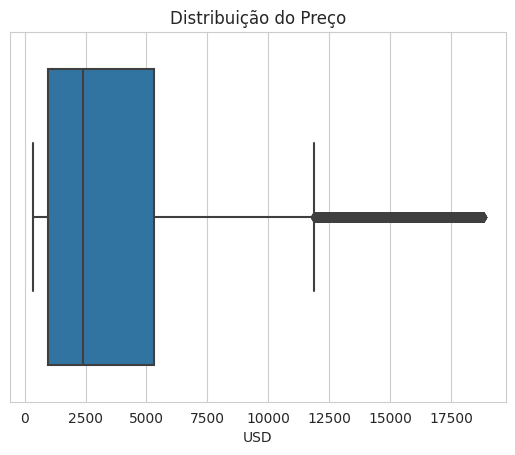

In [ ]:
# gráfico do exercício 1

with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=data['price'])
  grafico.set(title='Distribuição do Preço', xlabel='USD');

**Insight do gráfico 1**: Com base no gráfico acima, observa-se que a maior parte dos preços dos diamantes está concentrada na faixa de USD 1250 a USD 5000, sendo que valores acima de USD 12000 são consideravelmente mais raros.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("diamonds")
data.head()

In [ ]:
# gráfico do exercício 2

diamonds = data[['carat', 'price','clarity']]
diamonds.head()

,carat,price,clarity
0,0.23,326,SI2
1,0.21,326,SI1
2,0.23,327,VS1
3,0.29,334,VS2
4,0.31,335,SI2


In [ ]:
# Organizar as tabelas numéricas em ordem crescente
new_data = diamonds.sort_values(by=['carat', 'price'], ascending=True).reset_index()
new_data.head()

,index,carat,price,clarity
0,14,0.2,345,SI2
1,31591,0.2,367,VS2
2,31592,0.2,367,VS2
3,31593,0.2,367,VS2
4,31594,0.2,367,VS2


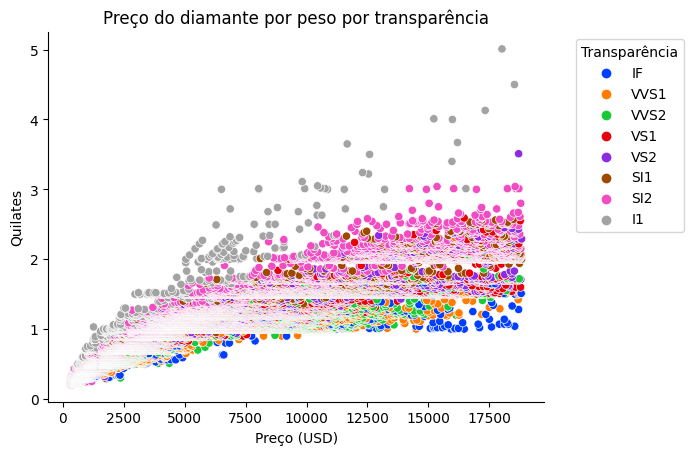

In [ ]:
grafico = sns.scatterplot(data=new_data, x="price", y="carat", hue="clarity", palette="bright")
grafico.set(title='Preço do diamante por peso por transparência', xlabel='Preço (USD)', ylabel='Quilates');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Transparência"); # Adicionando título a legenda e realocada para fora do gráfico
sns.despine() # Remoção das bordas do gráfico

In [ ]:
grafico = sns.heatmap(data=diamonds, cmap="Spectral")
grafico.set(title='Preço do diamente por peso por claridade', xlabel='Preço (USD)', ylabel='Peso');

**Insight do gráfico 2**: Com base na análise do gráfico, observa-se que diamantes com maior clareza apresentam um aumento de preço mesmo quando possuem poucos quilates. Em contraste, diamantes com menor clareza necessitam de maior peso (quilates) para atingir o mesmo valor que seus equivalentes de maior clareza.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv",sep=",")

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
# gráfico do exercício 3
cars = data[['weight', 'model_year']]
cars.head()

,weight,model_year
0,3504,70
1,3693,70
2,3436,70
3,3433,70
4,3449,70


Text(0.5, 1.0, 'Tendência do peso dos carros ao longo dos anos')

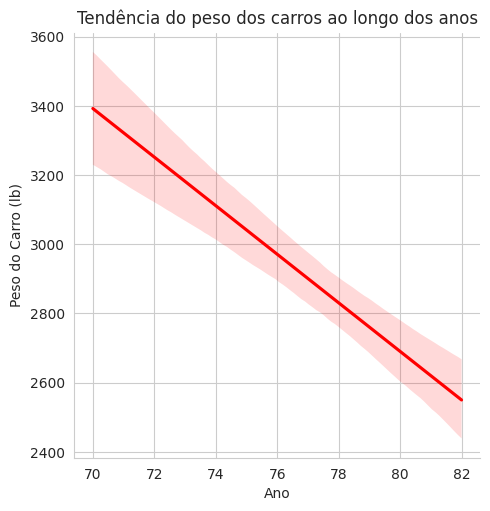

In [41]:
with sns.axes_style('whitegrid'):
  sns.lmplot(x="model_year", y="weight", data=cars, scatter=False, line_kws={'color': 'red'})

# Adicionar rótulos e título
plt.xlabel("Ano")
plt.ylabel("Peso do Carro (lb)")
plt.title("Tendência do peso dos carros ao longo dos anos")

In [39]:
# Calcular a redução percentual da média de peso dos carros
peso_ano_70 = 3400
peso_ano_82 = 2560

# Calculo
reducao_percentual = ((peso_ano_70 - peso_ano_82) / peso_ano_70) * 100
print(f"{round(reducao_percentual)}%")

25%


**Insight do gráfico 3**: Com base no gráfico acima, podemos inferir que ao longo dos anos de 1970 a 1982, houve uma redução de cerca de 25% na média de peso dos carros.

---